In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("doggo.jpeg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found.")


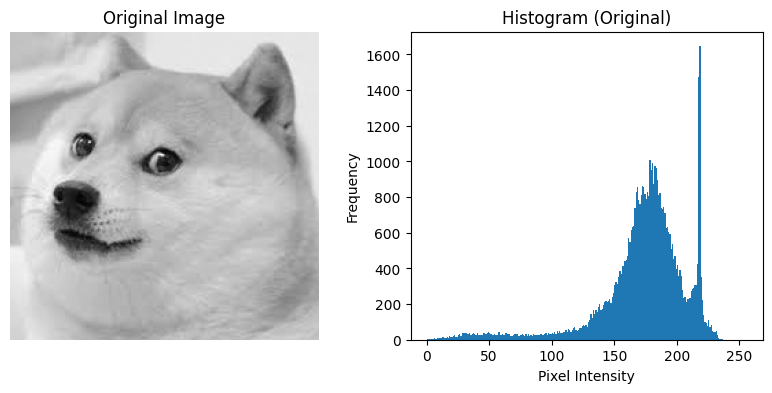

In [2]:
#plot histogram
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title("Histogram (Original)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


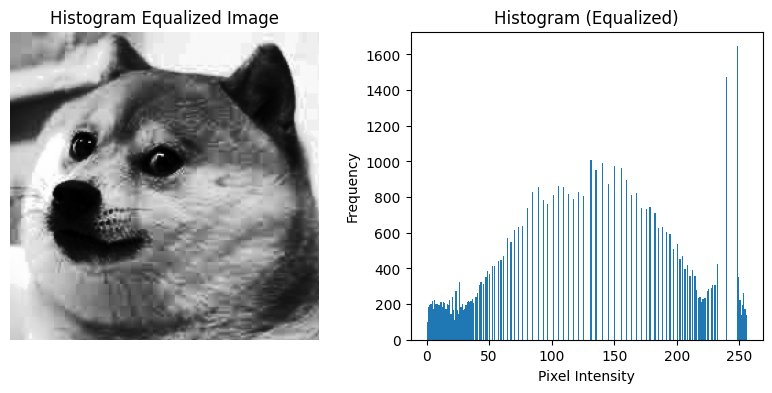

Histogram Equalization Comments:
- The original histogram often shows clustering in certain ranges, making the image appear dull or less detailed.
- After equalization, the image becomes brighter and clearer.
- Dark areas become more visible, and fine details are easier to distinguish.
- The histogram becomes more uniform, indicating a wider intensity distribution.


In [5]:
#histogram equalization
equalized_img = cv2.equalizeHist(img)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256))
plt.title("Histogram (Equalized)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Histogram Equalization Comments
print("Histogram Equalization Comments:")
print("- The original histogram often shows clustering in certain ranges, making the image appear dull or less detailed.")
print("- After equalization, the image becomes brighter and clearer.")
print("- Dark areas become more visible, and fine details are easier to distinguish.")
print("- The histogram becomes more uniform, indicating a wider intensity distribution.")


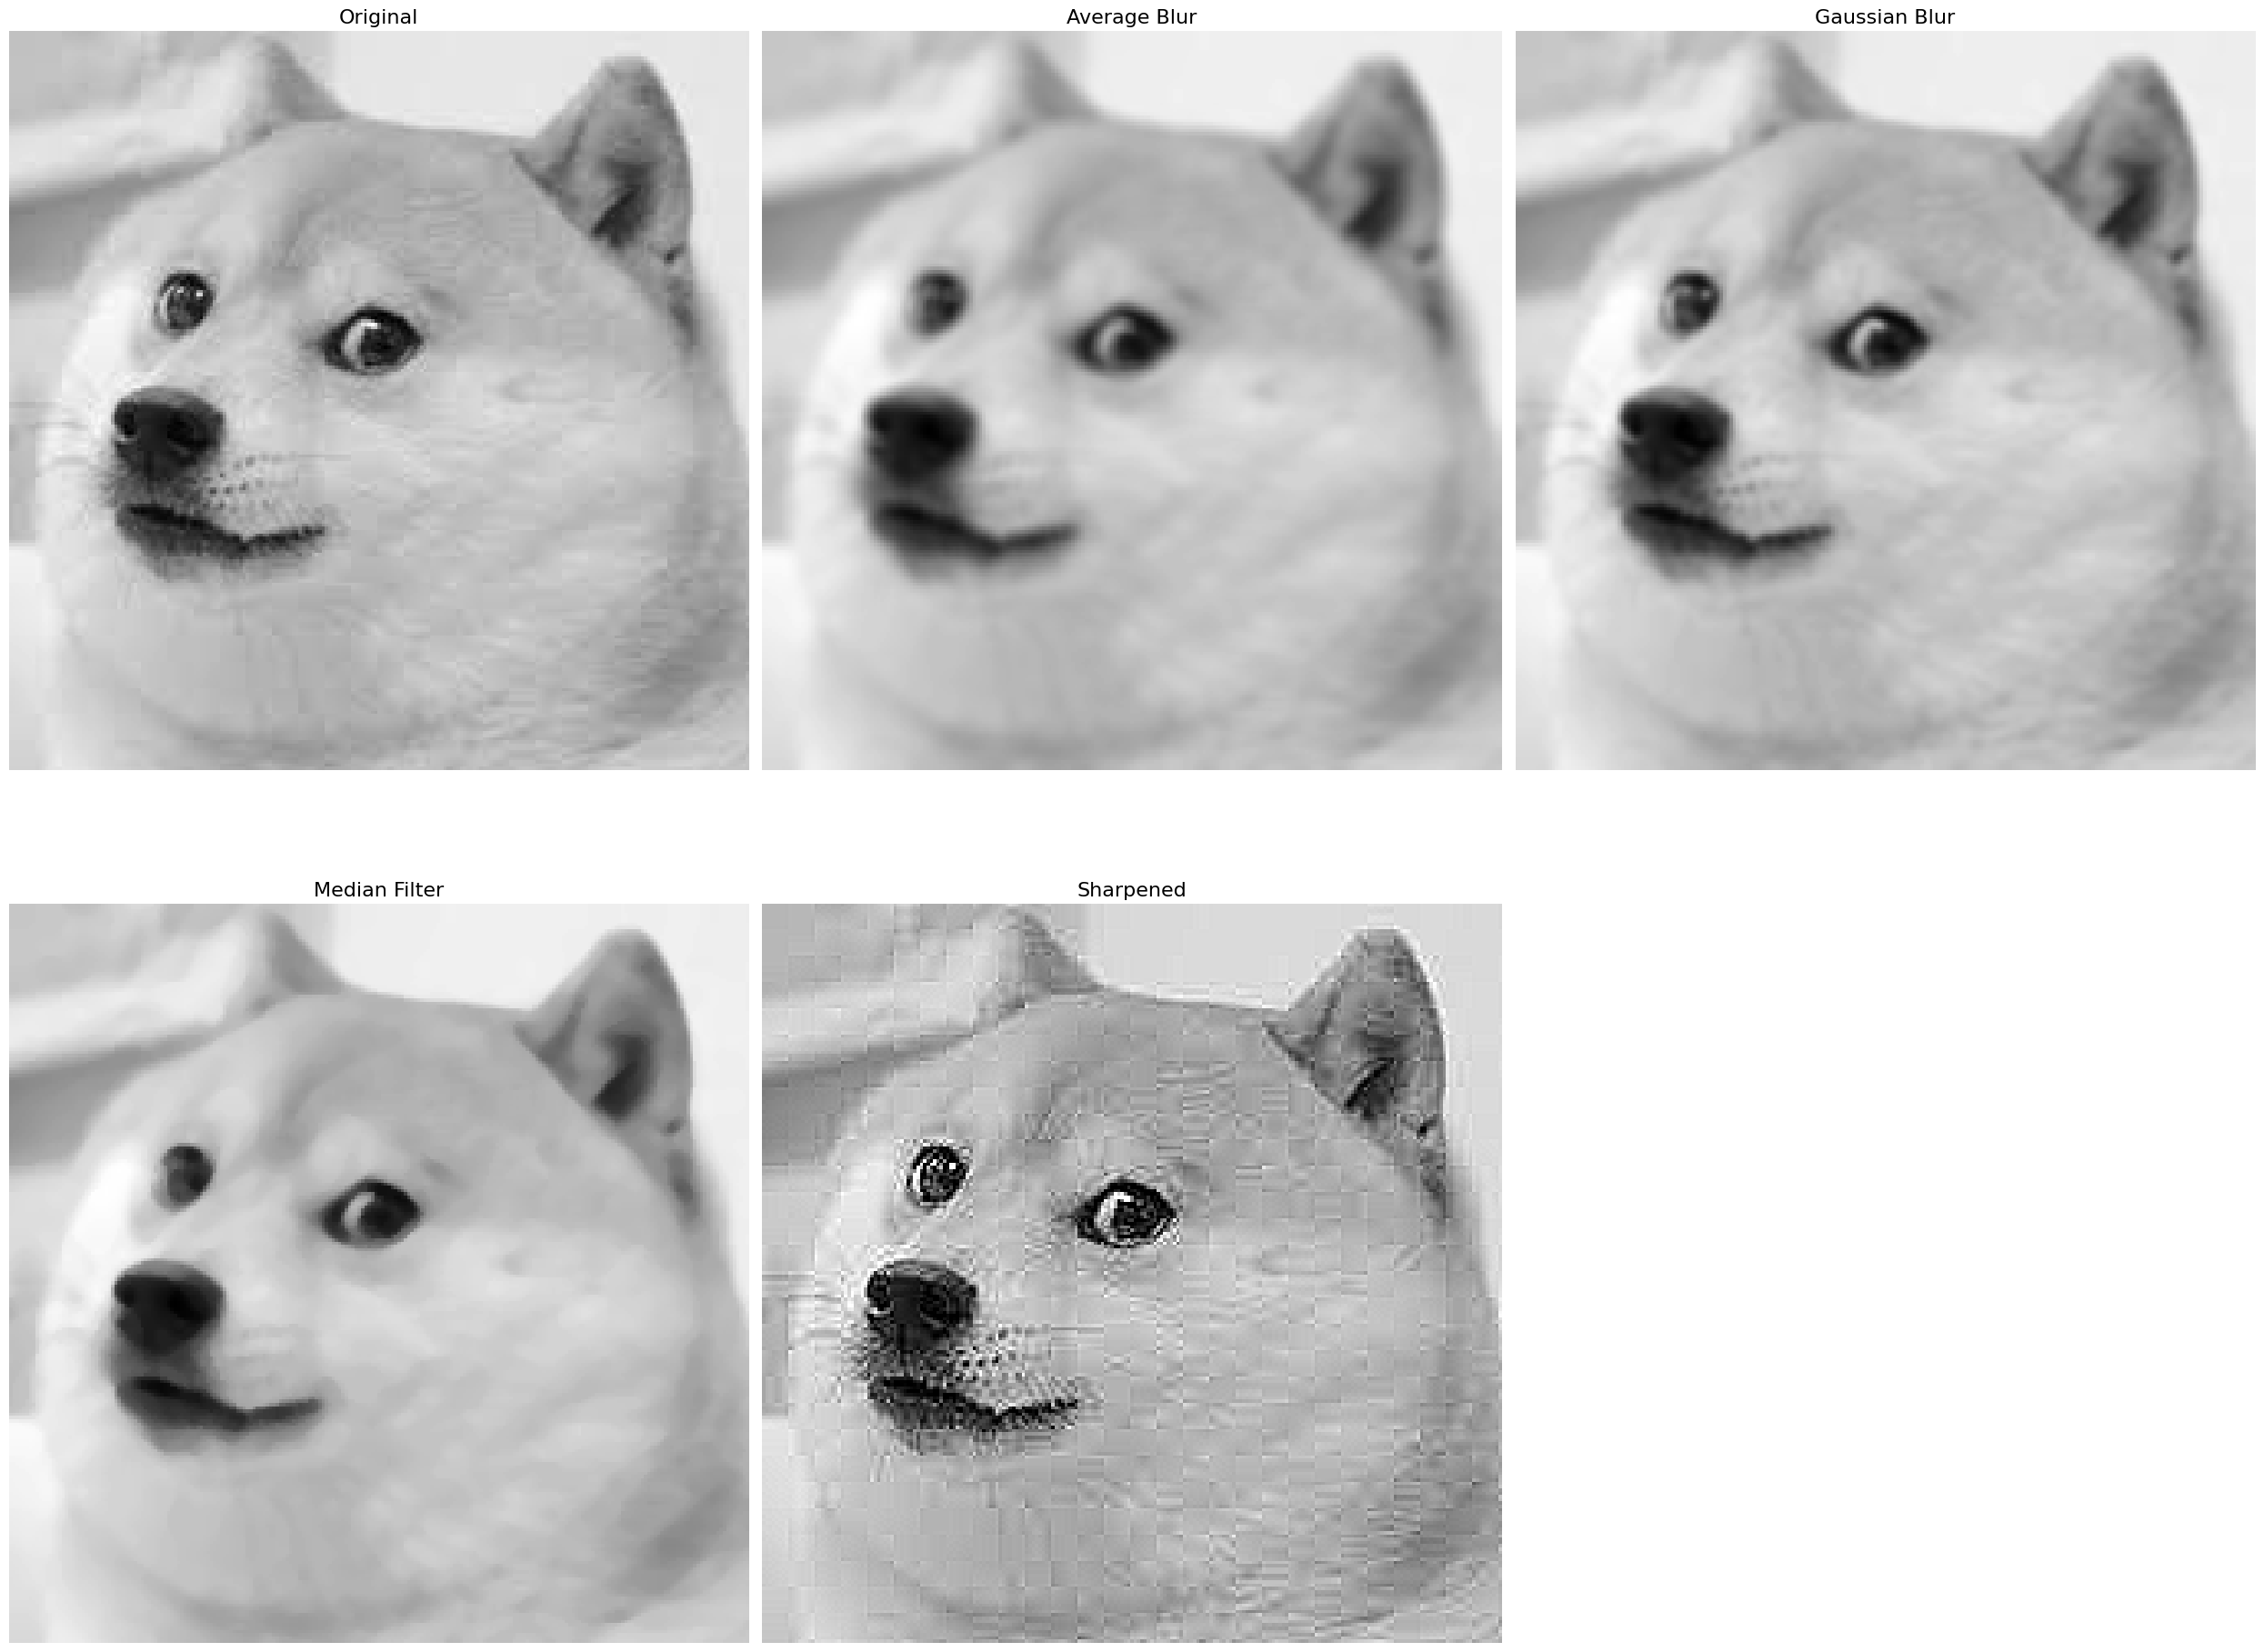

Spatial Filter Comments:
- Blurring filters reduce noise but can soften the image.
- Sharpening enhances details, but may also amplify noise if present.


In [7]:
# Apply spatial filters
mean_filtered = cv2.blur(img, (5,5))                   
gaussian_filtered = cv2.GaussianBlur(img, (5,5), 1)    
median_filtered = cv2.medianBlur(img, 5)               
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpened_filtered = cv2.filter2D(img, -1, sharpen_kernel)  

# Titles and images list
titles = ['Original', 'Average Blur', 'Gaussian Blur', 'Median Filter', 'Sharpened']
images = [img, mean_filtered, gaussian_filtered, median_filtered, sharpened_filtered]

# Display all images in a larger figure
plt.figure(figsize=(25, 20)) 
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=16)  
    plt.axis('off')

plt.tight_layout()
plt.show()

# Spatial Filter Comments
print("Spatial Filter Comments:")
print("- Blurring filters reduce noise but can soften the image.")
print("- Sharpening enhances details, but may also amplify noise if present.")


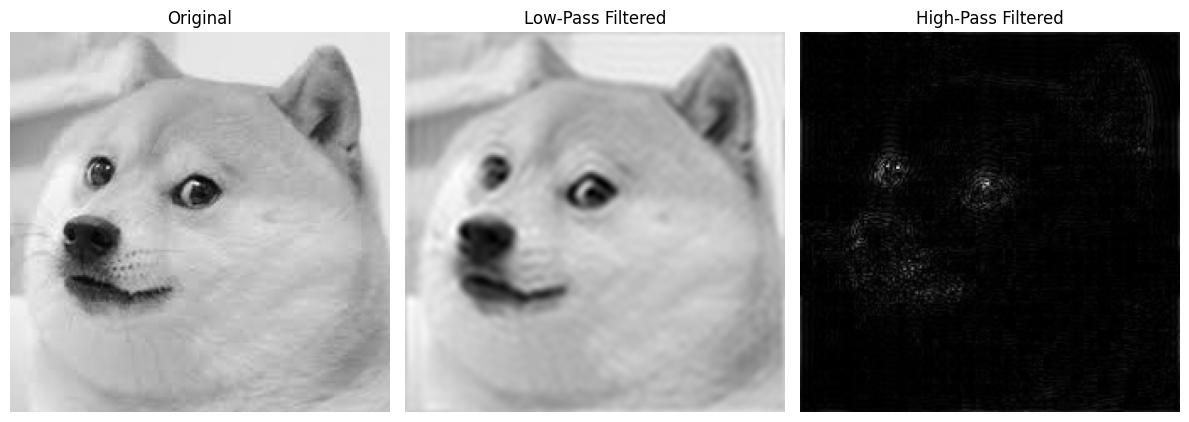

Frequency Domain Filter Comments:
- Low-Pass Filter (LPF) gives a blurred version similar to spatial averaging.
- High-Pass Filter (HPF) highlights edges and transitions, making boundaries and textures more prominent.


In [8]:
# Frequency domain filtering
dft = np.fft.fft2(img)                 
dft_shift = np.fft.fftshift(dft)      

# Create Low-Pass Filter (LPF) mask
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros_like(img, dtype=np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

lpf_result = np.fft.ifft2(np.fft.ifftshift(dft_shift * mask))
lpf_result = np.abs(lpf_result)

# Create High-Pass Filter (HPF) mask
hpf_mask = 1 - mask

hpf_result = np.fft.ifft2(np.fft.ifftshift(dft_shift * hpf_mask))
hpf_result = np.abs(hpf_result)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(lpf_result, cmap='gray')
plt.title('Low-Pass Filtered')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hpf_result, cmap='gray')
plt.title('High-Pass Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()

# Frequency Domain Filter Comments
print("Frequency Domain Filter Comments:")
print("- Low-Pass Filter (LPF) gives a blurred version similar to spatial averaging.")
print("- High-Pass Filter (HPF) highlights edges and transitions, making boundaries and textures more prominent.")
